In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
import joblib

In [50]:
Smart_band_health=pd.read_csv("DATA/health_data_80to90_accuracy.csv")
Smart_band_health.head()
Smart_band_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    200 non-null    object 
 1   heart_rate   200 non-null    float64
 2   temperature  200 non-null    float64
 3   label        200 non-null    object 
dtypes: float64(2), object(2)
memory usage: 6.4+ KB


##VISUALIZE DATA

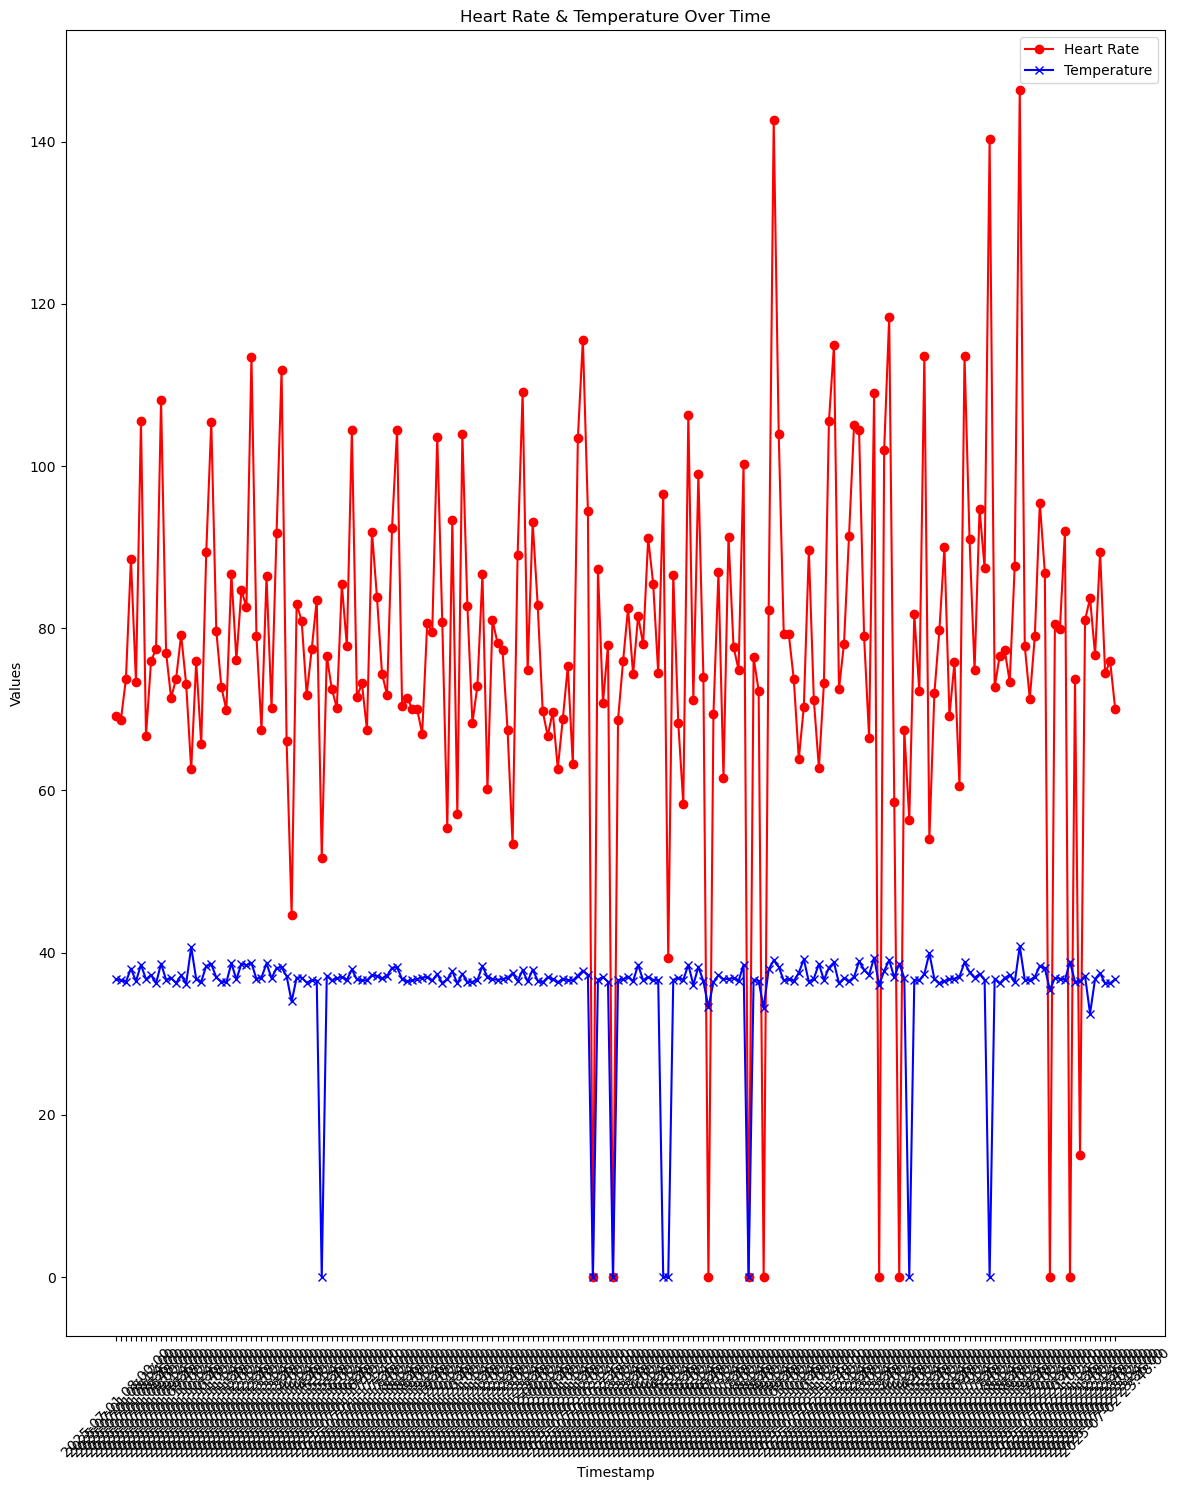

In [43]:
plt.figure(figsize=(12,15))
plt.plot(Smart_band_health["timestamp"], Smart_band_health["heart_rate"], label="Heart Rate", color='red', marker='o')
plt.plot(Smart_band_health["timestamp"], Smart_band_health["temperature"], label="Temperature", color='blue', marker='x')
plt.xticks(rotation=45)
plt.xlabel("Timestamp")
plt.ylabel("Values")
plt.title("Heart Rate & Temperature Over Time")
plt.legend()
plt.tight_layout()
plt.show()

#LABEL DATA DISTRIBUTION

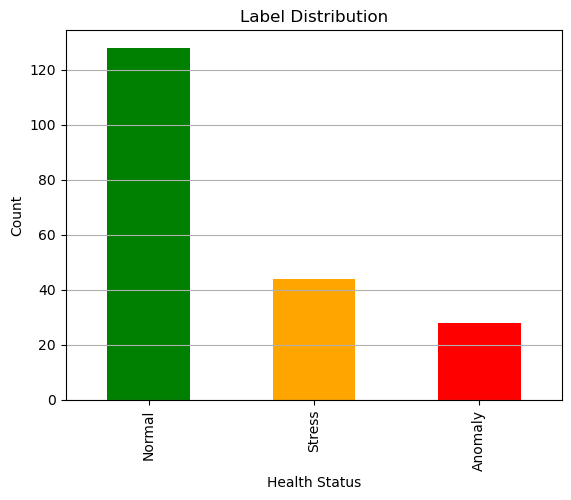

In [44]:
Smart_band_health["label"].value_counts().plot(kind='bar', color=['green', 'orange', 'red'])
plt.title("Label Distribution")
plt.xlabel("Health Status")
plt.ylabel("Count")
plt.grid(axis='y')
plt.show()

#prepare  features

#train Test Split

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = Smart_band_health[["heart_rate", "temperature"]]
y = Smart_band_health["label"]

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [46]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

#EVALUATE THE MODEL

Classification Report:
               precision    recall  f1-score   support

     Anomaly       1.00      0.78      0.88         9
      Normal       0.95      1.00      0.97        19
      Stress       0.92      1.00      0.96        12

    accuracy                           0.95        40
   macro avg       0.96      0.93      0.94        40
weighted avg       0.95      0.95      0.95        40



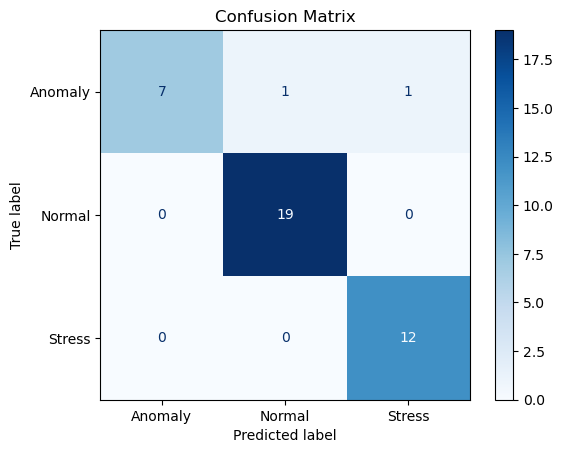

In [47]:
y_pred = clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=le.classes_, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [48]:
joblib.dump(clf, "health_model.pkl")
joblib.dump(le, "label_encoder.pkl")

print("Model and encoder saved successfully!")


Model and encoder saved successfully!


Classification Report:

              precision    recall  f1-score   support

     Anomaly       1.00      0.78      0.88         9
      Normal       0.95      1.00      0.97        19
      Stress       0.92      1.00      0.96        12

    accuracy                           0.95        40
   macro avg       0.96      0.93      0.94        40
weighted avg       0.95      0.95      0.95        40


 Model Accuracy: 95.00%


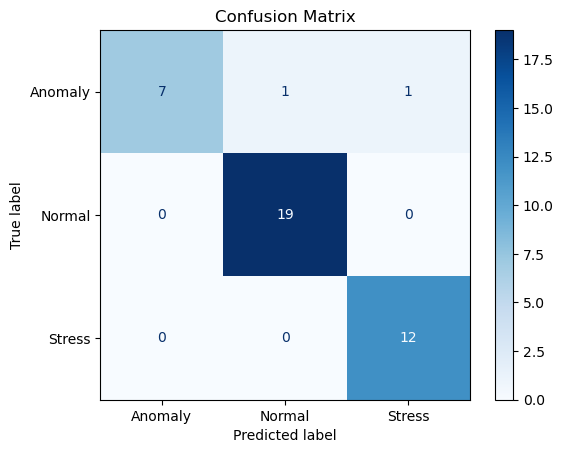

In [49]:
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))
acc = accuracy_score(y_test, y_pred)
print(f"\n Model Accuracy: {acc * 100:.2f}%")
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=le.classes_, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()
